In [1]:
from typing import Literal, TypedDict

import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle
from constants import DATA_DIR

from astrofit.model.enums import SortOptionEnum
from astrofit.utils import (
    AsteroidLoader,
    FrequencyDecomposer,
    LightcurveBinner,
    LightcurvePlotter,
    LightcurveSplitter,
)
from astrofit.utils.enums import BinningMethodEnum

In [2]:
asteroid_loader = AsteroidLoader(DATA_DIR)
lightcurve_binner = LightcurveBinner()
lightcurve_plotter = LightcurvePlotter()
lightcurve_splitter = LightcurveSplitter()
frequency_decomposer = FrequencyDecomposer()

In [3]:
asteroids = sorted((
    asteroid_loader.load_asteroid(name) for name in asteroid_loader.available_asteroids
), key=lambda asteroid: asteroid.period)
asteroids[:5]

[Asteroid(id=29204, name=Ladegast, period=2.031527, lambda=183.0, beta=-78.0, lightcurves=1),
 Asteroid(id=52820, name=1998 RS2, period=2.134122, lambda=58.0, beta=-48.0, lightcurves=1),
 Asteroid(id=7779, name=Susanring, period=2.19003, lambda=151.0, beta=-22.0, lightcurves=1),
 Asteroid(id=138831, name=2000 UD68, period=2.28689, lambda=281.0, beta=-34.0, lightcurves=1),
 Asteroid(id=16118, name=Therberens, period=2.28855, lambda=174.0, beta=-55.0, lightcurves=1)]

In [4]:
len(asteroids)

5057

In [5]:
np.percentile([asteroid.period for asteroid in asteroids], [0, 5, 25, 50, 75, 90, 95, 100])

array([   2.031527,    3.422438,    5.48469 ,    8.78678 ,   16.97036 ,
         49.0198  ,  108.6936  , 1304.1     ])

In [6]:
no_lightcurves = [len(asteroid.lightcurves) for asteroid in asteroids]
np.percentile(no_lightcurves, [0, 5, 25, 50, 75, 90, 95, 100])

array([  1.,   1.,   1.,   1.,   2.,   2.,  13., 187.])

In [7]:
no_points = [len(lightcurve.points) for asteroid in asteroids for lightcurve in asteroid.lightcurves]
np.percentile(no_points, [0, 5, 25, 50, 75, 90, 95, 100])

array([1.0000e+00, 8.0000e+00, 2.3000e+01, 4.6000e+01, 1.3100e+02,
       4.1800e+02, 5.1835e+02, 1.0275e+04])

In [8]:
asteroid, = [asteroid for asteroid in asteroids if asteroid.name == "Eunomia"]
asteroid

Asteroid(id=15, name=Eunomia, period=6.082754, lambda=356.0, beta=-70.0, lightcurves=107)

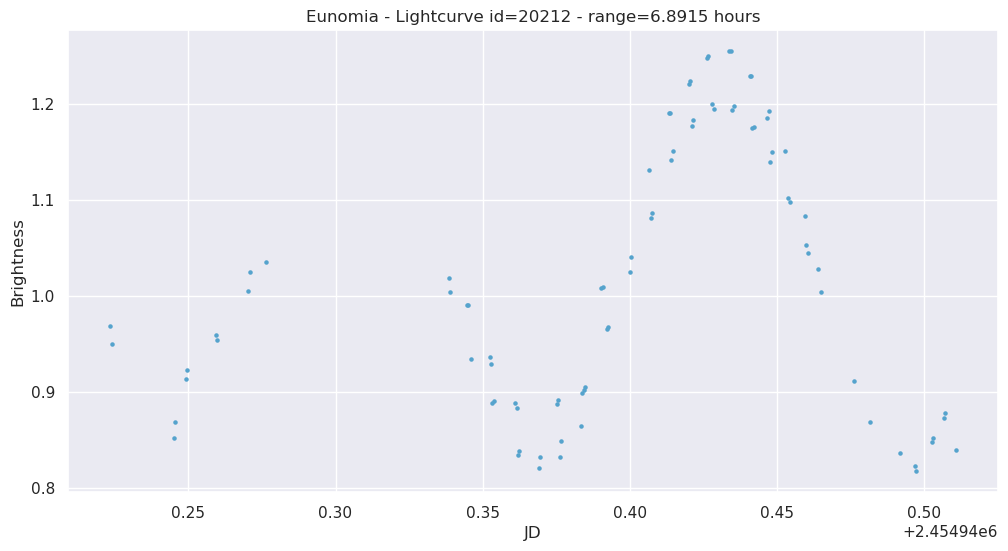

In [9]:
asteroid.get_longest_lightcurve(by=SortOptionEnum.PERIOD).plot(asteroid_name=asteroid.name)

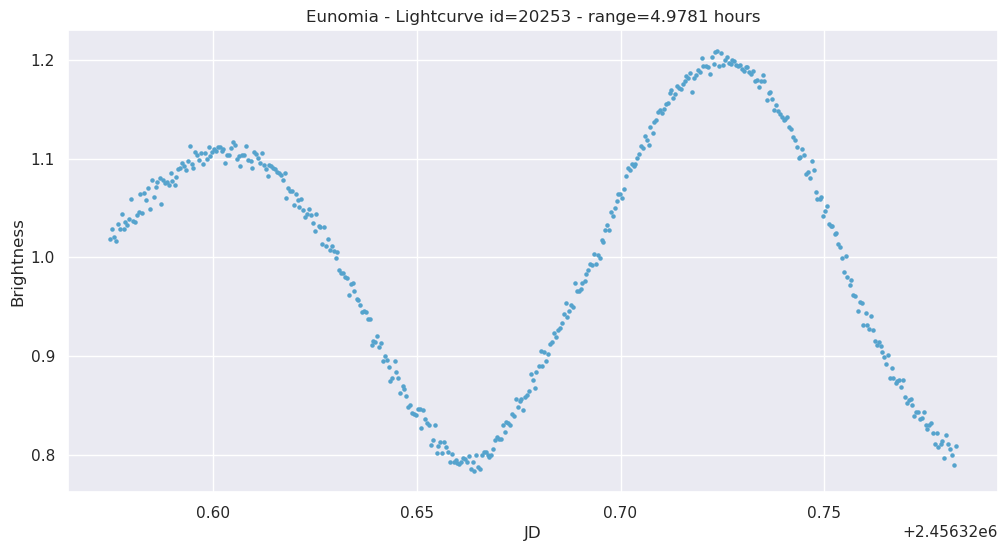

In [10]:
asteroid.get_longest_lightcurve(by=SortOptionEnum.POINTS).plot(asteroid_name=asteroid.name)

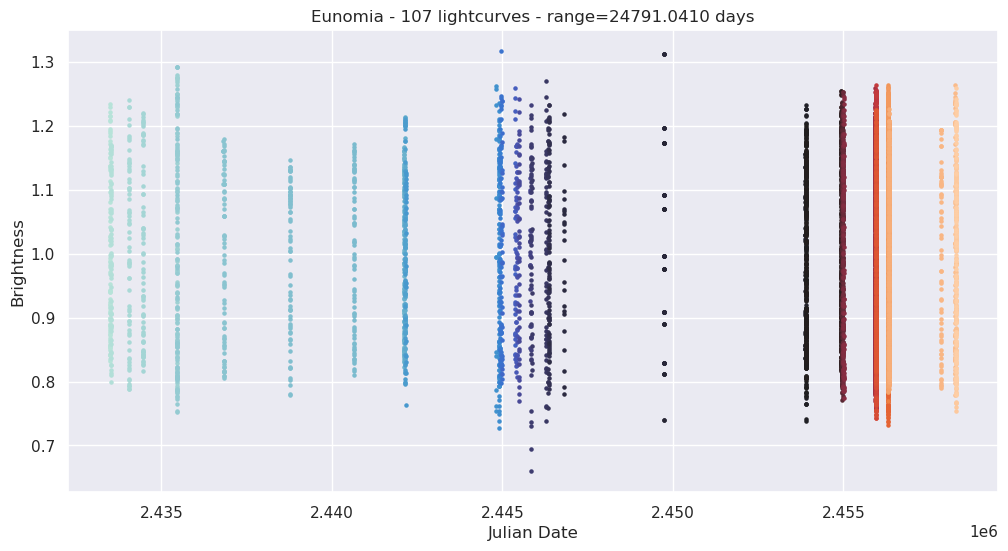

In [11]:
lightcurve_plotter.plot_lightcurves(asteroid.lightcurves, split_plots=False, asteroid_name=asteroid.name)

In [12]:
splitted = lightcurve_splitter.split_lightcurves(
    asteroid.lightcurves,
    max_hours_diff=24,
    min_no_points=10,
)
splitted[:5]

[Lightcurve(id=384, period=4.54889h, points_count=85, first_JD=2433504.627269, last_JD=2433504.816806),
 Lightcurve(id=385, period=3.51689h, points_count=69, first_JD=2433508.62303, last_JD=2433508.769567),
 Lightcurve(id=386, period=6.05369h, points_count=67, first_JD=2434036.591406, last_JD=2434036.843643),
 Lightcurve(id=387, period=4.27997h, points_count=71, first_JD=2434474.676486, last_JD=2434474.854818),
 Lightcurve(id=388, period=5.65970h, points_count=66, first_JD=2435462.58043, last_JD=2435462.816251)]

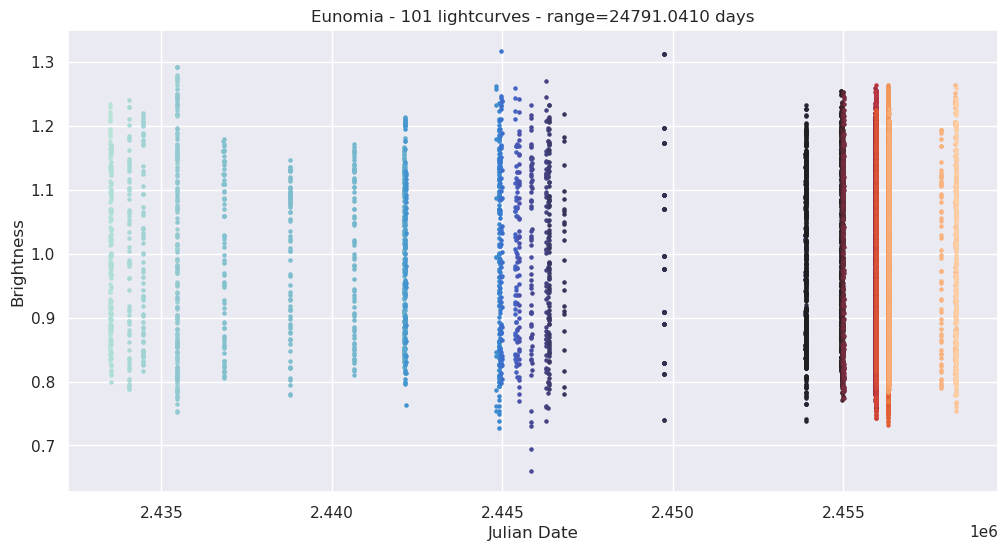

In [13]:
lightcurve_plotter.plot_lightcurves(splitted, split_plots=False, asteroid_name=asteroid.name)

In [14]:
bins = lightcurve_binner.bin_lightcurves(
    splitted,
    max_time_diff=45,
    binning_method=BinningMethodEnum.FIRST_TO_FIRST_DIFF,
)
bins = sorted(bins, key=lambda bin: bin.points_count, reverse=True)
bins

[LightcurveBin(lightcurves=13, period=24.14826h, points=3553),
 LightcurveBin(lightcurves=15, period=17.11985h, points=2607),
 LightcurveBin(lightcurves=15, period=43.91697h, points=958),
 LightcurveBin(lightcurves=9, period=11.15077h, points=486),
 LightcurveBin(lightcurves=4, period=11.08636h, points=342),
 LightcurveBin(lightcurves=5, period=37.36199h, points=215),
 LightcurveBin(lightcurves=3, period=6.12003h, points=180),
 LightcurveBin(lightcurves=2, period=4.14230h, points=154),
 LightcurveBin(lightcurves=3, period=27.03721h, points=154),
 LightcurveBin(lightcurves=5, period=9.06087h, points=146),
 LightcurveBin(lightcurves=3, period=23.07224h, points=138),
 LightcurveBin(lightcurves=4, period=18.18790h, points=116),
 LightcurveBin(lightcurves=1, period=6.40205h, points=80),
 LightcurveBin(lightcurves=2, period=1.14788h, points=78),
 LightcurveBin(lightcurves=1, period=6.58303h, points=76),
 LightcurveBin(lightcurves=1, period=6.12305h, points=72),
 LightcurveBin(lightcurves=1, 

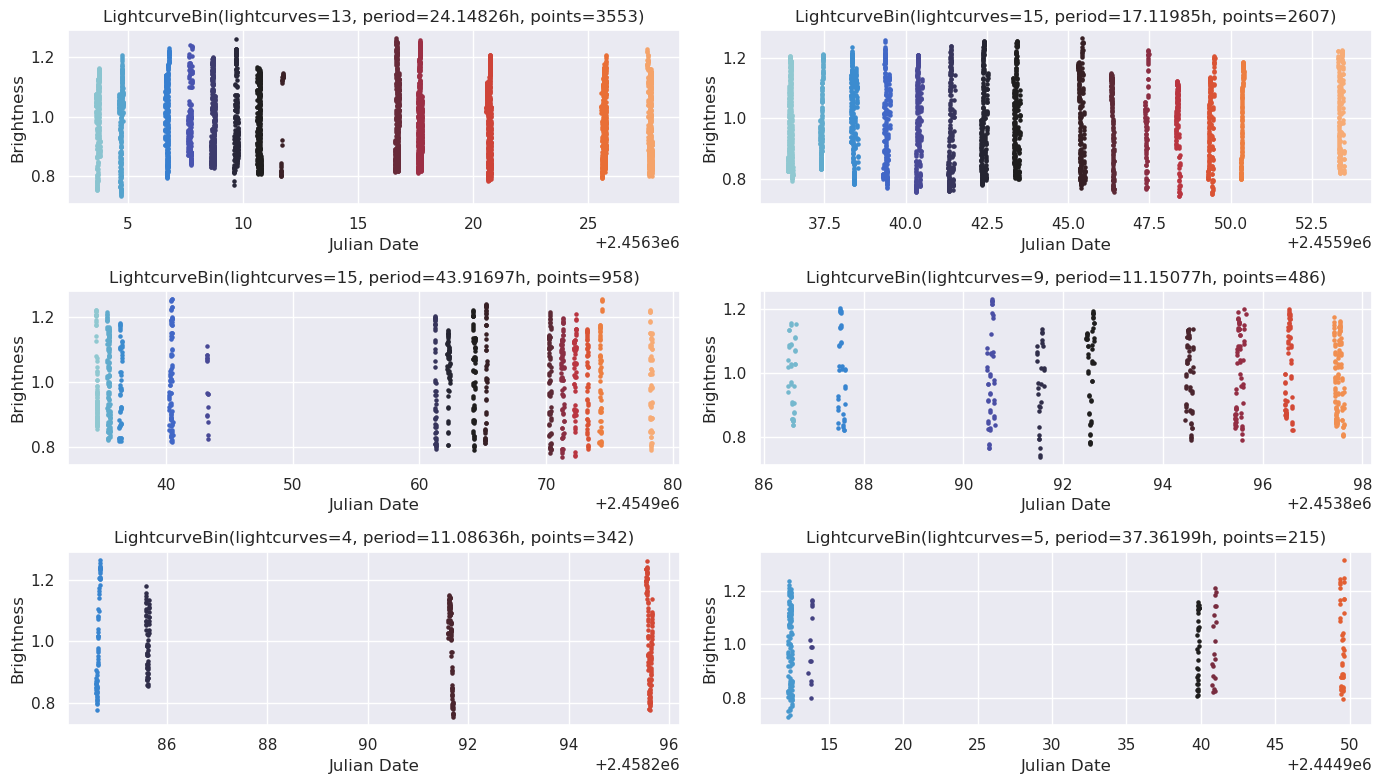

In [15]:
lightcurve_plotter.plot_bins_on_grid(bins[:6])

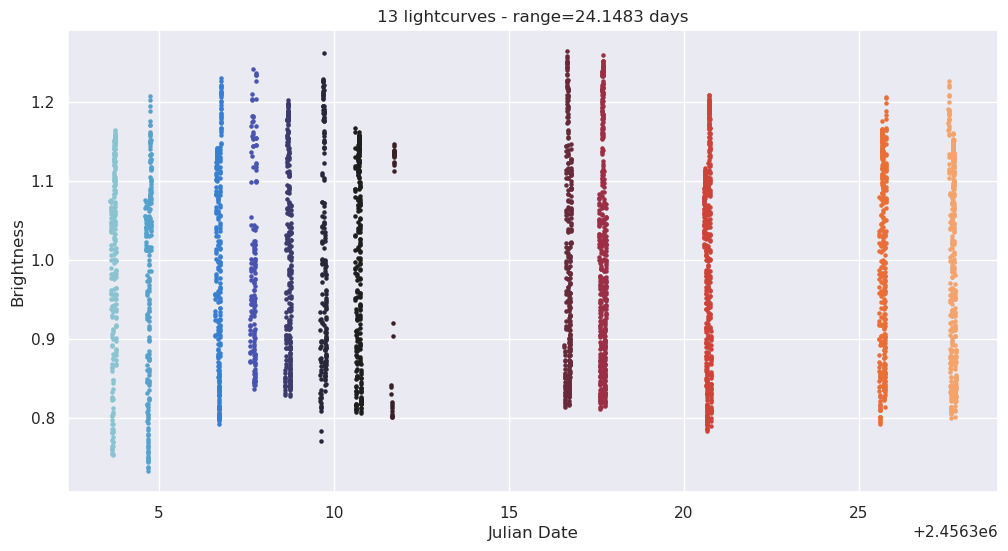

In [16]:
_bin = bins[0]
lightcurve_plotter.plot_lightcurves(_bin, split_plots=False)

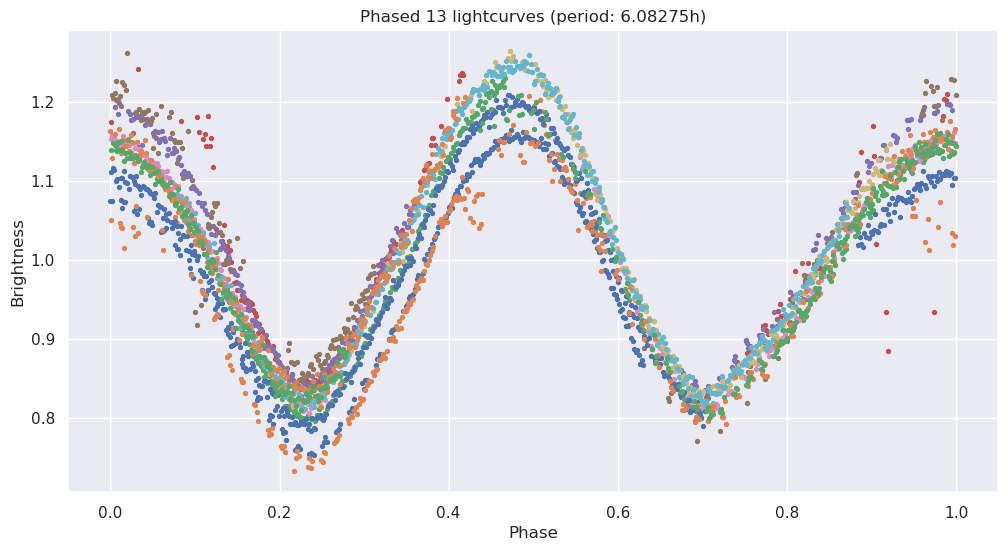

In [17]:
lightcurve_plotter.plot_phased_lightcurves(_bin, period=asteroid.period)

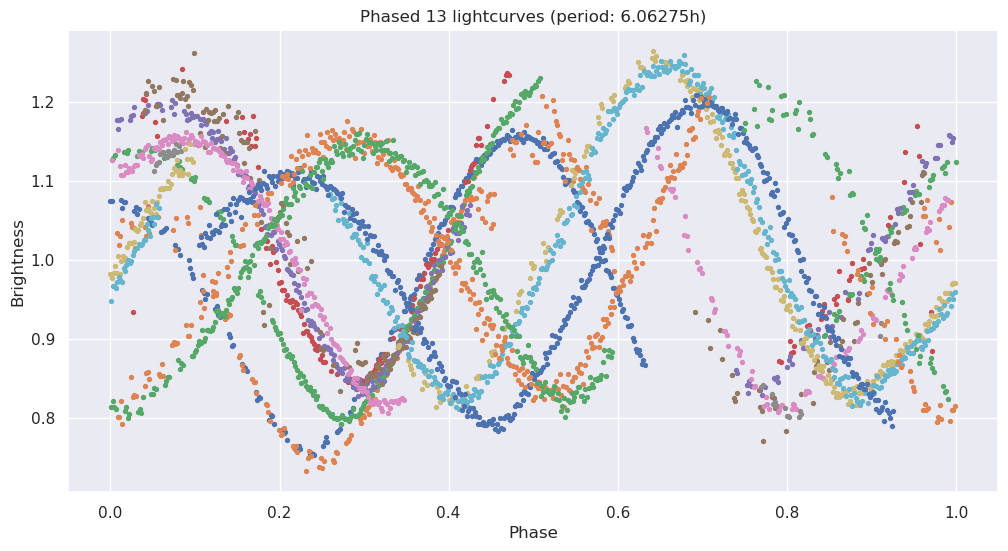

In [18]:
lightcurve_plotter.plot_phased_lightcurves(_bin, period=asteroid.period - 0.02)

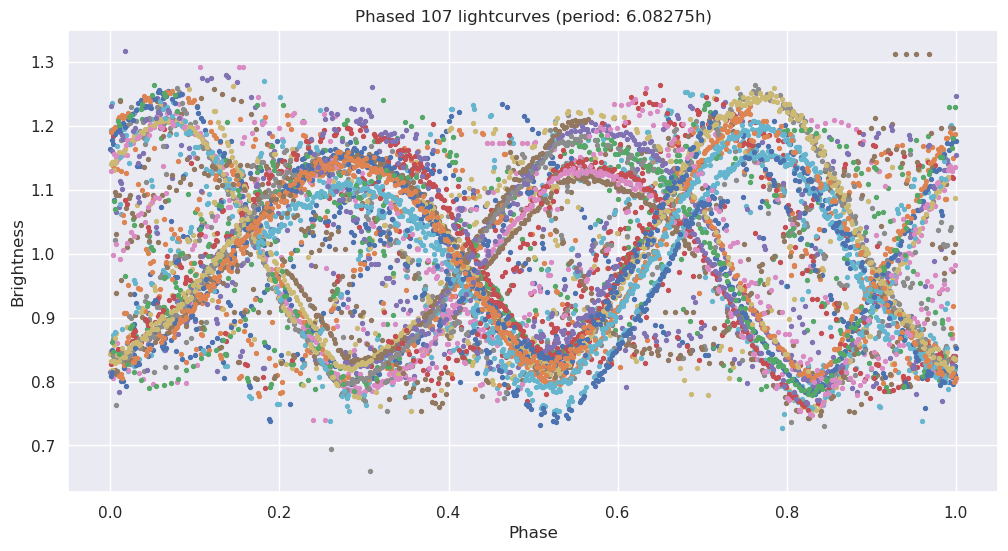

In [19]:
lightcurve_plotter.plot_phased_lightcurves(asteroid.lightcurves, period=asteroid.period)

In [20]:
print(f"Asteroid period: {asteroid.period:>9}")
print(f"Target frequency: {24 * 1 / asteroid.period:.6f}")

Asteroid period:  6.082754
Target frequency: 3.945581


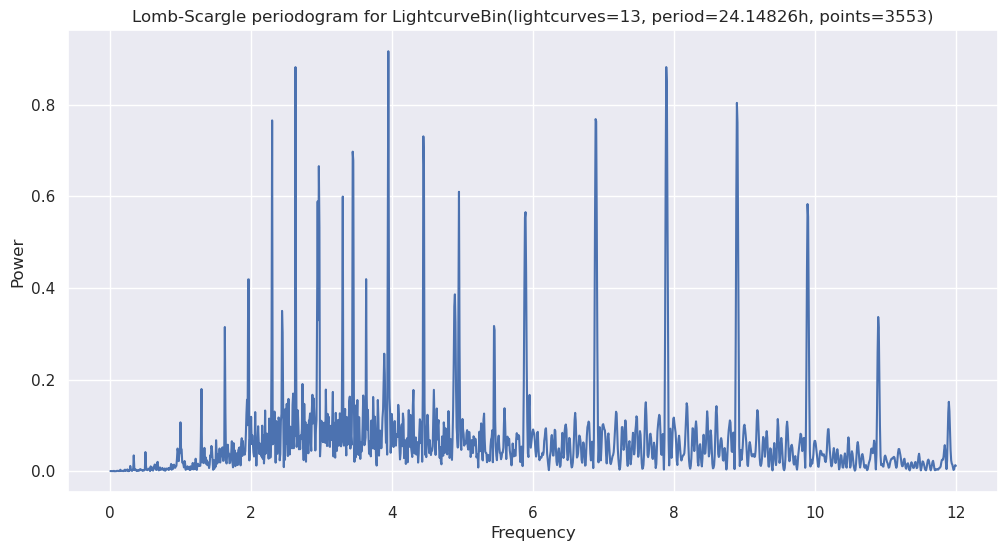

array([[ 3.94645411,  0.91649573],
       [ 7.88876714,  0.8819315 ],
       [ 2.62958905,  0.88181765],
       [ 7.89704931,  0.84574044],
       [ 8.89090974,  0.80380219],
       [ 6.88662454,  0.7684381 ],
       [ 2.29830224,  0.76560732],
       [ 6.89490671,  0.7633825 ],
       [ 8.89919191,  0.76072489],
       [ 4.44338433,  0.73078674],
       [ 3.44124173,  0.6974217 ],
       [ 3.4495239 ,  0.67768924],
       [ 4.4516665 ,  0.66938728],
       [ 2.96087586,  0.66576063],
       [ 7.88048497,  0.64967342],
       [ 4.94859671,  0.60984473],
       [ 8.88262757,  0.60191748],
       [ 3.30044484,  0.59944422],
       [ 2.94431152,  0.58892773],
       [ 9.89305234,  0.58306306],
       [ 7.90533148,  0.58124257],
       [ 5.89276412,  0.56544035],
       [ 9.90133451,  0.55494107],
       [ 5.88448195,  0.5539036 ],
       [ 6.87834237,  0.55132415],
       [ 6.90318888,  0.54532327],
       [ 2.96915803,  0.53166017],
       [ 8.90747408,  0.51548909],
       [ 3.93817194,

In [21]:
frequency_decomposer.decompose_bin(_bin, fourier_nterms=3, top_k=50, max_freq=12, show_plot=True)